In [11]:
from qiskit import QuantumCircuit 
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector
import matplotlib as plt 
from qiskit.visualization import plot_bloch_multivector , plot_histogram

In Deutsch’s algorithm, the oracle is a black-box quantum circuit that encodes a function 
𝑓
:
{
0
,
1
}
→
{
0
,
1
}
f:{0,1}→{0,1}. It acts on two qubits, the input qubit 
𝑥
x and an auxiliary qubit 
𝑦
y, according to the rule 
∣
𝑥
,
𝑦
⟩
↦
∣
𝑥
,
𝑦
⊕
𝑓
(
𝑥
)
⟩
∣x,y⟩↦∣x,y⊕f(x)⟩. This means the oracle modifies the second qubit by adding 
𝑓
(
𝑥
)
f(x) modulo 2, while leaving the first qubit unchanged. There are four possible functions: two constant and two balanced.

In the constant0 case (
𝑓
(
𝑥
)
=
0
f(x)=0), nothing happens to the 
𝑦
y-qubit.

In the constant1 case (
𝑓
(
𝑥
)
=
1
f(x)=1), the 
𝑦
y-qubit is always flipped (an 
𝑋
X gate).

In the balanced_x case (
𝑓
(
𝑥
)
=
𝑥
f(x)=x), the 
𝑦
y-qubit is flipped if and only if the input is 1 (a CNOT).

In the balanced_notx case (
𝑓
(
𝑥
)
=
¬
𝑥
f(x)=¬x), the 
𝑦
y-qubit is flipped when the input is 0 (a CNOT followed by an extra 
𝑋
X).

By putting the input qubit into a superposition and applying the oracle once, Deutsch’s algorithm ensures that the final measurement on the input qubit directly distinguishes the two categories: result 
∣
0
⟩
∣0⟩ means the function is constant, while result 
∣
1
⟩
∣1⟩ means the function is balanced.

In [2]:


def oracle(qc , ftype):
    if ftype == "constant0":
        pass  # do nothing
    elif ftype == "constant1":
        qc.x(1)  # flip bottom qubit
    elif ftype == "balanced_x":
        qc.cx(0,1)  # CNOT
    elif ftype == "balanced_notx":
        qc.cx(0,1)
        qc.x(1)


Balanced Case Explanation:

In the balanced case, the oracle is designed so that the output depends on the input qubit — meaning the function returns 0 for one input and 1 for the other. In our circuit, the "balanced_x" oracle implements this with a CNOT gate, which flips the second (work) qubit when the first (input) qubit is |1⟩. Because the work qubit is initialized in the |−⟩ state, this flip produces a phase kickback onto the input qubit. After applying the final Hadamard to the input qubit, this phase information is converted into a measurable result. Measuring the input qubit always gives |1⟩, which signals that the function is balanced. The work qubit’s final value (here it ends in |1⟩) is not relevant for deciding constant vs balanced.

Constant Case Explanation:

In the constant case, the oracle is designed so that the function output is the same no matter what the input qubit is. For example, in the "constant0" oracle the work qubit is left untouched, while in the "constant1" oracle the work qubit is always flipped with an X gate. Since the work qubit starts in the |−⟩ state, flipping it only changes its global phase, which has no physical effect on the input qubit. As a result, after applying the final Hadamard to the input qubit, the measurement always yields |0⟩. This outcome signals that the function is constant, and again, the work qubit’s final value is irrelevant for the decision.

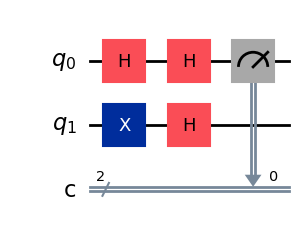

In [14]:
qc = QuantumCircuit(2,2)
qc.x(1)
qc.h([0,1])
oracle(qc , "constant0")

qc.h(0)
qc.measure(0,0)
qc.draw('mpl')

measurement, {'00': 1024}


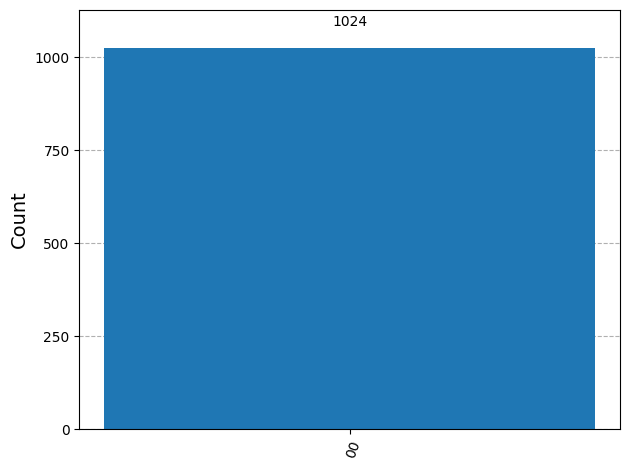

In [15]:
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc , shots = 1024)
result = job.result()
counts = result.get_counts()
print("measurement," , counts)
plot_histogram(counts)